In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread  # converts image to array 
import tensorflow as tf

In [2]:
os.listdir('cell_images')

['test', 'train']

In [3]:
test_path = os.path.join('cell_images/test')
train_path = os.path.join('cell_images/train')

In [4]:
test_path

'cell_images/test'

In [5]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [6]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [7]:
os.listdir(train_path+ '/parasitized')[0]

'C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [8]:
para_cell = train_path+'/parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_162.png'

In [9]:
imread(para_cell)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [10]:
imread(para_cell).max()   # image values are already normalized(0-1)

0.9098039

In [11]:
imread(para_cell).min()    

0.0

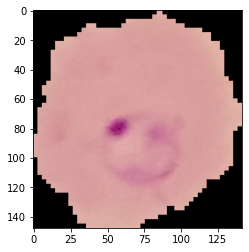

In [12]:
plt.imshow(imread(para_cell));

In [13]:
imread(para_cell).shape

(148, 142, 3)

In [14]:
os.listdir(train_path+'/uninfected')[0]

'C100P61ThinF_IMG_20150918_144104_cell_128.png'

In [15]:
unif = train_path+'/uninfected'+'/C100P61ThinF_IMG_20150918_144104_cell_128.png'
unif

'cell_images/train/uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png'

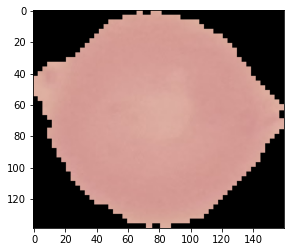

In [16]:
plt.imshow(imread(unif));

In [17]:
imread(unif).shape

(139, 160, 3)

In [18]:
len(os.listdir(train_path+'\\parasitized'))

12480

In [19]:
len(os.listdir(train_path+'/uninfected'))

12480

- Let's find out the average dimensions of these images
- Images are of different size
- so lets take average image size and convert other images to mean value

In [20]:
# https://stackoverflow.com/questions/1507084/how-to-check-dimensions-of-all-images-in-a-directory-using-python
dim1 = []
dim2 = []
for image_filename in os.listdir(test_path+'\\uninfected'):
    
    img = imread(test_path+'\\uninfected'+'\\'+image_filename)
    d1,d2,colors = img.shape
    dim1.append(d1)
    dim2.append(d2)

In [21]:
dim1 # all images are of different shape

[118,
 172,
 130,
 163,
 172,
 139,
 151,
 160,
 145,
 127,
 121,
 154,
 145,
 127,
 154,
 151,
 148,
 130,
 160,
 136,
 139,
 190,
 127,
 133,
 136,
 124,
 151,
 151,
 151,
 160,
 118,
 154,
 154,
 121,
 127,
 118,
 130,
 124,
 163,
 88,
 139,
 127,
 121,
 139,
 166,
 133,
 124,
 154,
 139,
 127,
 124,
 136,
 166,
 133,
 145,
 157,
 181,
 148,
 112,
 124,
 112,
 106,
 121,
 148,
 148,
 112,
 121,
 148,
 97,
 112,
 142,
 118,
 130,
 151,
 133,
 136,
 115,
 145,
 115,
 142,
 136,
 130,
 142,
 124,
 142,
 136,
 166,
 148,
 136,
 142,
 133,
 130,
 139,
 124,
 139,
 121,
 130,
 142,
 133,
 118,
 157,
 127,
 109,
 112,
 139,
 142,
 142,
 112,
 118,
 100,
 127,
 145,
 136,
 160,
 187,
 130,
 130,
 157,
 130,
 130,
 151,
 175,
 145,
 136,
 157,
 133,
 127,
 154,
 133,
 151,
 130,
 136,
 160,
 130,
 139,
 145,
 145,
 145,
 154,
 133,
 160,
 142,
 157,
 145,
 136,
 121,
 115,
 121,
 121,
 127,
 145,
 130,
 133,
 142,
 127,
 121,
 139,
 118,
 118,
 148,
 121,
 145,
 130,
 169,
 142,
 136,
 148,


C:\Users\aldrinds\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


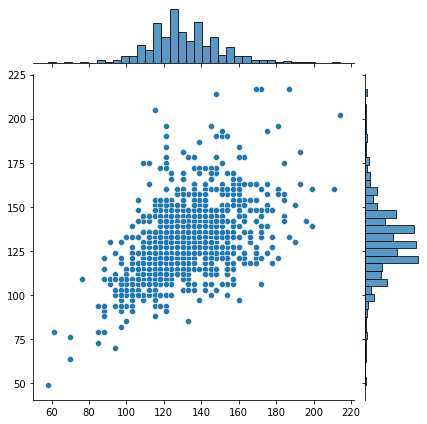

In [22]:
sns.jointplot(dim1,dim2);  # mean is around 130,130 from graph

In [23]:
np.mean(dim1)

130.92538461538462

In [24]:
np.mean(dim2)

130.75

--------------------------------

In [26]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [27]:
image_gen = ImageDataGenerator(rotation_range= 20,width_shift_range= 0.1,height_shift_range= 0.1,
                              shear_range= 0.1,zoom_range= 0.1,horizontal_flip= True,vertical_flip= True,
                              fill_mode= 'nearest')

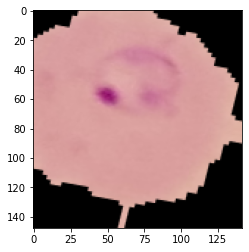

In [28]:
plt.imshow(image_gen.random_transform(imread(para_cell)));

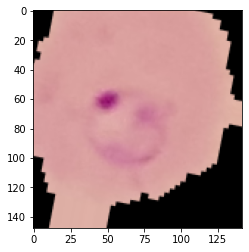

In [29]:
plt.imshow(image_gen.random_transform(imread(para_cell)));

In [30]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [31]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


-------------------

## Creating Model

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout

In [33]:
model = Sequential()
model.add(Conv2D(32,kernel_size= (3,3),activation= "relu",input_shape = input_shape))
model.add(MaxPooling2D())

model.add(Conv2D(64,kernel_size= (3,3),activation= "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,kernel_size= (3,3),activation= "relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,kernel_size= (3,3),activation= "relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(128,activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation= "relu"))
model.add(Dropout(0.3))
model.add(Dense(1,activation="sigmoid"))

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 29, 29, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [35]:
model.compile(loss = "binary_crossentropy",optimizer = "adam", metrics= ["accuracy"])

In [36]:
train_image_gen = image_gen.flow_from_directory(train_path,target_size= (130,130),class_mode= "binary",batch_size= 16)

Found 24958 images belonging to 2 classes.


In [37]:
test_image_gen = image_gen.flow_from_directory(test_path,target_size=(130,130),class_mode= "binary",batch_size= 16)

Found 2600 images belonging to 2 classes.


In [38]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [39]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.94):
            print("\nReached 95% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [40]:
model.fit_generator(train_image_gen,epochs= 20,validation_data= test_image_gen,callbacks= callbacks)

C:\Users\aldrinds\AppData\Local\Temp/ipykernel_11932/401419409.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_image_gen,epochs= 20,validation_data= test_image_gen,callbacks= callbacks)


Epoch 1/20
1560/1560 [==============================] - ETA: 0s - loss: 0.3584 - accuracy: 0.8569
Reached 95% accuracy so cancelling training!
1560/1560 [==============================] - 542s 347ms/step - loss: 0.3584 - accuracy: 0.8569 - val_loss: 0.1862 - val_accuracy: 0.9435


--------------

### Testing and Predictions

In [41]:
hist = pd.DataFrame(model.history.history)
hist

,loss,accuracy,val_loss,val_accuracy
0,0.358412,0.85692,0.186224,0.943462


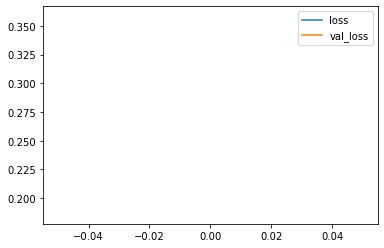

In [42]:
hist[["loss","val_loss"]].plot();

In [43]:
model.evaluate(test_image_gen,verbose = 2)

163/163 - 18s - loss: 0.1858 - accuracy: 0.9435 - 18s/epoch - 111ms/step


[0.18575695157051086, 0.943461537361145]

In [44]:
from tensorflow.keras.preprocessing import image

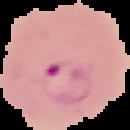

In [45]:
pred_img1 = image.load_img(para_cell,target_size= (130,130))
pred_img1

In [46]:
pred_img1 = image.img_to_array(pred_img1)
pred_img1.shape

(130, 130, 3)

In [47]:
pred_img1 = np.expand_dims(pred_img1,axis=0)
pred_img1.shape

(1, 130, 130, 3)

In [48]:
a = model.predict(pred_img1)
a

array([[0.01108006]], dtype=float32)

In [49]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [50]:
def pred(x):
    if a> 0.4:
        print("1---> uninfected")
    else:
        print('0--> parasitized')

In [51]:
pred(a)

0--> parasitized


## predict manual images

In [52]:
def img(s):
    z = image.load_img(s,target_size= (input_shape))
    z
    z = image.img_to_array(z)
    z = np.expand_dims(z,axis = 0)
    a = model.predict(z)
    
    if a> 0.4:
        print("1---> uninfected")
    else:
        print('0--> parasitized')

In [59]:
img("infected_3.png")

0--> parasitized
